In [7]:
# Process data as illustrated in 02-eda
%run 03-process.py

DataFrame loaded into base, 1558278 records
Processed, 869044 records remaining


In [12]:
# creating advanced metrics, then defining which I'll use to model
import pandas as pd
from seaborn import plt
import seaborn as sns
%matplotlib inline

metrics = ['ASSESSED_IMP_VALUE',
           'landval_perc',
           'BED',
           'BATH',
           'AGE',
           'STORIES',
           # 'GARAGE_TYPE',
           'PARKING',
           'TOTAL_UNITS',
           # 'POOL',
           # 'FIREPLACE',
           'BUILDING_AREA',
           'lot_perc',
           'ptype']

X = basef2[metrics]
basef2[metrics].head()

,ASSESSED_IMP_VALUE,landval_perc,BED,BATH,AGE,STORIES,PARKING,TOTAL_UNITS,BUILDING_AREA,lot_perc,ptype
0,61857,0.249996,2,1.0,119,2,0,0,572,0.7712,SFR
1,300000,0.300000,2,0.5,119,2,0,0,572,0.7712,SFR
2,143292,0.122038,4,2.0,119,2,0,0,1672,0.3312,SFR
3,83386,0.327273,4,1.5,119,2,0,0,1144,0.5424,SFR
4,56096,0.324319,4,2.0,129,2,0,1,1594,0.3624,MFR


In [9]:
dummies = pd.get_dummies(X.ptype)
X_cont = X.iloc[:,0:-1]
X_dum = pd.concat([X_cont, dummies], axis = 1)
X_dum.head()

,ASSESSED_IMP_VALUE,landval_perc,BED,BATH,AGE,STORIES,PARKING,TOTAL_UNITS,BUILDING_AREA,lot_perc,CONDO,COOP,MFR,MOBILE,SFR,SFR-PUD,TOWNHOUSE
0,61857,0.249996,2,1.0,119,2,0,0,572,0.7712,0,0,0,0,1,0,0
1,300000,0.300000,2,0.5,119,2,0,0,572,0.7712,0,0,0,0,1,0,0
2,143292,0.122038,4,2.0,119,2,0,0,1672,0.3312,0,0,0,0,1,0,0
3,83386,0.327273,4,1.5,119,2,0,0,1144,0.5424,0,0,0,0,1,0,0
4,56096,0.324319,4,2.0,129,2,0,1,1594,0.3624,0,0,1,0,0,0,0


In [ ]:
# takes a long time to run!!
plt.figure(figsize=(12,12))
sns.pairplot(X_dum)

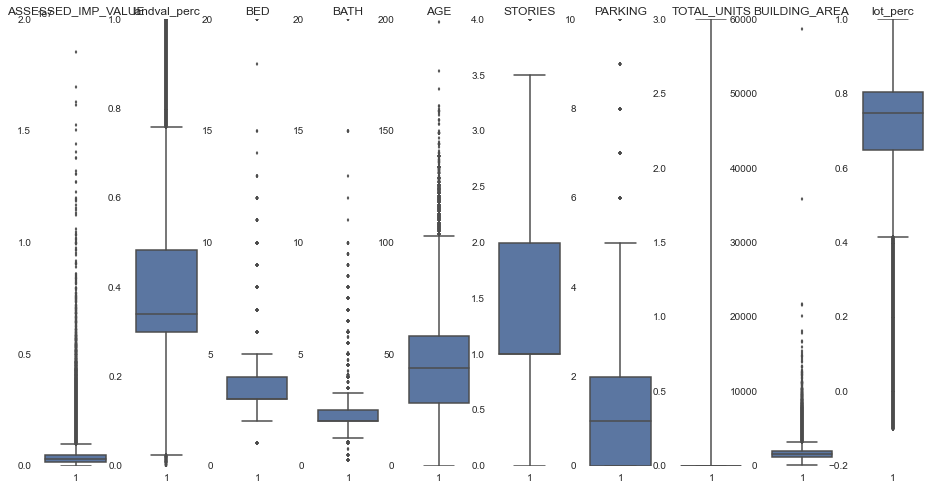

In [13]:
fig = plt.figure(figsize=(16,8))

for i in range(len(X_cont.columns)):
    ax = fig.add_subplot(1, len(X_cont.columns), i+1)
    sns.boxplot(X_cont.iloc[:,i])
    ax.set_title(X_cont.columns[i])

In [14]:
from sklearn.preprocessing import scale

# not scaling dummy variables since it looks weird
X_scaled = scale(X_cont)
X_scaled = pd.DataFrame(X_scaled, columns = X_cont.columns, index = X_cont.index)
X_het = pd.concat([X_scaled, dummies], axis = 1)
X_het.describe().T

,count,mean,std,min,25%,50%,75%,max
ASSESSED_IMP_VALUE,869044,-1.222089e-13,1.000001,-1.004578,-0.597642,-0.227793,0.281298,48.649153
landval_perc,869044,3.616543e-14,1.000001,-2.489963,-0.606008,-0.350653,0.548740,3.789561
BED,869044,3.287833e-13,1.000001,-2.434412,-0.280103,-0.280103,0.797052,18.031525
BATH,869044,7.269484e-13,1.000001,-2.367367,-0.115582,-0.115582,0.527785,23.045639
AGE,869044,4.007911e-12,1.000001,-1.881564,-0.719669,-0.055729,0.525218,6.376189
STORIES,869044,-9.080934e-14,1.000001,-2.770645,-0.658427,-0.658427,1.453791,5.678227
PARKING,869044,-1.373612e-12,1.000001,-1.013395,-1.013395,-0.047885,0.917625,8.641703
TOTAL_UNITS,869044,2.431935e-12,1.000001,-0.343086,-0.343086,-0.343086,-0.343086,7.183915
BUILDING_AREA,869044,-4.229520e-13,1.000001,-2.168576,-0.669434,-0.222417,0.419488,77.608957
lot_perc,869044,4.320731e-15,1.000001,-4.302155,-0.259320,0.274498,0.582537,1.638763


In [15]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
ASSESSED_IMP_VALUE,869044,375230.206046,373518.530637,2.000000,152000.000000,290145.500000,480300.000000,18546580.000000
landval_perc,869044,0.396494,0.159231,0.000015,0.299999,0.340659,0.483871,0.999910
BED,869044,3.260040,0.928372,1.000000,3.000000,3.000000,4.000000,20.000000
BATH,869044,2.089826,0.777162,0.250000,2.000000,2.000000,2.500000,20.000000
AGE,869044,45.342996,24.098579,0.000000,28.000000,44.000000,58.000000,199.000000
STORIES,869044,1.311723,0.473436,0.000000,1.000000,1.000000,2.000000,4.000000
PARKING,869044,1.049596,1.035723,0.000000,0.000000,1.000000,2.000000,10.000000
TOTAL_UNITS,869044,0.136742,0.398565,0.000000,0.000000,0.000000,0.000000,3.000000
BUILDING_AREA,869044,1717.199303,733.753371,126.000000,1226.000000,1554.000000,2025.000000,58663.000000
lot_perc,869044,0.696508,0.185115,-0.099885,0.648504,0.747321,0.804344,0.999867


In [16]:
print len(X_het[X_scaled.STORIES > 5]) | len(X_het[X_scaled.TOTAL_UNITS > 5])
XS = X_het[(X_scaled.STORIES <= 5) & (X_scaled.TOTAL_UNITS <= 5)]
print len(XS)

2871
866126


#PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ASSESSED_IMP_VALUE,0.329466,-0.348685,0.402291,-0.054626,0.060296,-0.552694,0.023568,-0.080868,0.459716,-0.278405
landval_perc,-0.053120,-0.512119,0.567136,0.145207,0.277023,0.433084,-0.002628,0.247331,-0.212721,0.146459
BED,0.384149,0.020005,-0.058156,-0.292762,-0.332520,0.547351,0.267465,0.274607,0.447679,-0.073562
BATH,0.475785,0.086849,0.024347,-0.125858,0.008798,-0.027784,0.113594,0.089462,-0.661968,-0.538233
AGE,-0.319823,-0.105267,0.340314,-0.161846,-0.655366,0.143725,-0.135227,-0.460444,-0.118552,-0.223861
STORIES,0.322357,0.303874,0.161190,0.323824,-0.083583,0.142023,-0.788988,0.094394,0.114543,-0.034842
PARKING,0.277020,-0.405375,-0.408402,0.127098,0.238874,0.308034,-0.108960,-0.635300,0.053691,-0.075349
TOTAL_UNITS,-0.025683,0.485653,0.360711,-0.452746,0.505189,0.186002,0.017483,-0.356413,0.105645,-0.008979
BUILDING_AREA,0.462404,-0.022881,0.120227,-0.207398,-0.228851,-0.176658,0.021211,-0.186561,-0.246282,0.740743
lot_perc,-0.131420,-0.322610,-0.243699,-0.692227,0.088521,-0.071309,-0.511450,0.250029,-0.054027,-0.012192


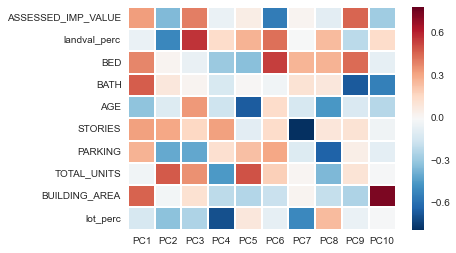

In [19]:
from sklearn.decomposition import PCA

pca = PCA(whiten = True)
pca.fit(X_scaled)

# check out the loadings
loadings = pd.DataFrame(pca.components_, index = map('PC{}'.format, range(1,len(X_scaled.columns)+1)), columns = X_scaled.columns).T
sns.heatmap(loadings)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Variance Ratio,0.344559,0.140236,0.120067,0.113513,0.077728,0.057931,0.054170,0.044322,0.028398,0.019077
Cumulative Variance Ratio,0.344559,0.484794,0.604862,0.718375,0.796103,0.854033,0.908204,0.952525,0.980923,1.000000


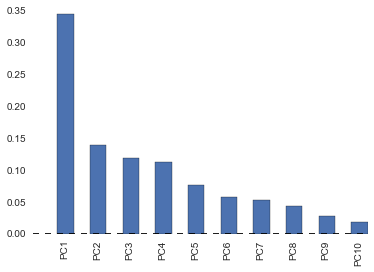

In [20]:
p = pd.DataFrame([pca.explained_variance_ratio_, pca.explained_variance_ratio_.cumsum()],
             index = ['Variance Ratio', 'Cumulative Variance Ratio'],
             columns = map('PC{}'.format, range(1, len(pca.components_)+1)))
p.T['Variance Ratio'].plot(kind = 'bar')
p

PCA doesn't help dimensionality reduction much (7 of 10 components required for 90% variance), and PC1 being the most important with others being a clump.

#KMeans

### Hyperparameter tuning
Beware, do not run below

In [ ]:
from sklearn.cluster import KMeans

results = {}
for i in range(5, 105, 10):
    kmeans = KMeans(i, max_iter = 100)
    kmeans.fit(X_dum)
    results[i] = kmeans.inertia_

results

In [ ]:
results_df = pd.DataFrame.from_dict(results, orient = 'index').sort()
results_df[1:10].plot()

### Fitting KMeans
Starting with 8 (instead of a high number) for visualization purposes

In [ ]:
from sklearn.cluster import KMeans

km8 = KMeans(8, max_iter = 300, verbose = 1) # tends to converge in the 20s, varying max_iter does not matter
km8.fit(X_het)
fh8 = km8.labels_
fh8_df = pd.Series(fh8, name = 'fh', index = X_het.index)
X8 = X_het.join(fh8_df)
X8 = X8.join(base[['FIDELITY_LATITUDE', 'FIDELITY_LONGITUDE']])
X8.head()

# Visualization

In [21]:
# This cell initializes the map projections
from mpl_toolkits.basemap import Basemap

bayarea  = Basemap(projection='merc', lat_0=((37.2056+38.385)/2), lon_0 = ((-122.791-121.667)/2),
                   llcrnrlat = 37.205572, llcrnrlon = -122.791252,
                   urcrnrlat = 38.385387, urcrnrlon = -121.667213,
                   resolution = 'h', area_thresh = 0.001)

# northbay = Basemap()

# southbay = Basemap()

eastbay = Basemap(projection='merc', lat_0=((37.796+37.9026)/2), lon_0=((-122.318-122.204)/2),
                  llcrnrlat = 37.796372, llcrnrlon = -122.318089,
                  urcrnrlat = 37.902642, urcrnrlon = -122.204105,
                  resolution = 'h', area_thresh = 0.001)

sf = Basemap(projection='merc', lat_0=((37.7077+37.8339)/2), lon_0=((-122.511243-122.361039)/2),
             llcrnrlat = 37.707739, llcrnrlon = -122.511243,
             urcrnrlat = 37.833933, urcrnrlon = -122.361039,
             resolution = 'h', area_thresh = 0.001)

In [ ]:
import numpy as np
def plot_pts(df, proj, markersize, alpha, fillcolor, bcolor, cmap):
    # df represents dataframe
    # proj represents what map, with eastbay, sf and bayarea as possible values
    plt.figure(figsize=(18,18))
    proj.drawcoastlines(color=bcolor)
    proj.drawmapboundary(color='gray', fill_color = 'lightblue')
    proj.fillcontinents(color = fillcolor)
    
    k = df.fh.max() + 1
    # k denotes how many clusters / colors of dots
    
    color_list = cmap(np.linspace(0, 1, k))
    
    for i in range(k):
        lat = df.FIDELITY_LATITUDE[df.fh == i].tolist()
        lon = df.FIDELITY_LONGITUDE[df.fh == i].tolist()
        x,y = proj(lon,lat)
        
        proj.plot(x, y, marker = 'o', markersize=markersize, linestyle = 'None',
                  markerfacecolor = (color_list[i][0], color_list[i][1], color_list[i][2]),
                  alpha = alpha, label = i)
        
    plt.legend(loc = "upper right")
    
# This function returns the points in dataframe df (must contain lat/long) on a proj (sf, bayarea, eastbay)
# with markersize 1-10, alpha .1/.2/.5/1, fillcolor white/none for the land, bcolor for the coastline,
# cmap (e.g. plt.cm.Paired) for color-scheme of points

In [ ]:
plot_pts(X8, sf, 5, .2, 'white', 'lightgray', plt.cm.Paired)
plot_pts(X8, eastbay, 5, .2, 'white', 'lightgray', plt.cm.Paired)
plot_pts(X8, bayarea, 2, .1, 'white', 'lightgray', plt.cm.Paired)

# Drawing the Decision Boundaries in the Mesh Grid
## Using SVC rbf kernel
### Investigation

In [ ]:
# Focusing only on SF for visualization
X_sf = X8[(X8.FIDELITY_LATITUDE > 37.7078) &
          (X8.FIDELITY_LATITUDE < 37.834) &
          (X8.FIDELITY_LONGITUDE > -122.51) &
          (X8.FIDELITY_LONGITUDE < -122.36)]

## Using kNN
### Investigation

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

knn_params = {
    'n_neighbors' : [1, 10, 50, 100, 200, 250],
    'metric' : ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'haversine'],
    'weights' : ['uniform', 'distance']
    }

knn_test1 = GridSearchCV(KNeighborsClassifier(), knn_params, 
                         cv=ShuffleSplit(len(X_sf), test_size=0.2, n_iter=1, random_state=0), # hack for cv=1/leave-p-out
                         verbose=3, refit=False, n_jobs=1)
knn_test1.fit(X_sf[['FIDELITY_LONGITUDE', 'FIDELITY_LATITUDE']], X_sf.fh)

print knn_test1.best_score_
print knn_test1.best_params_
knn_test1.grid_scores_

NameError: name 'X_sf' is not defined

In [24]:
score1 = [x[2][0] for x in knn_test1.grid_scores_]
# score2 = [x[2][1] for x in knn_test1.grid_scores_]
setting = [x[0] for x in knn_test1.grid_scores_]
distmetric = [x['metric'] for x in setting]
weights = [x['weights'] for x in setting]
n_neighbors = [x['n_neighbors'] for x in setting]

knn_df = pd.DataFrame(zip(score1, distmetric, weights, n_neighbors), 
                      columns = ['score1', 'distmetric', 'weights', 'n_neighbors'])

import numpy as np
from itertools import cycle

colors = cycle('rgbcmykw')
distmetric_ids = knn_df.distmetric.unique()
fig = plt.figure()
ax1 = fig.add_subplot(121)

for label, c in zip(distmetric_ids, colors):
    ax1.scatter(knn_df.ix[knn_df.distmetric == label, 'n_neighbors'], knn_df.ix[knn_df.distmetric == label, 'score1'],
    c=c, label=label, marker = 'o')
    # ax1.scatter(knn_df.ix[knn_df.distmetric == label, 'n_neighbors'], knn_df.ix[knn_df.distmetric == label, 'score2'],
    # c=c)
ax1.legend(loc = 'lower right')
ax1.set_xlim(0,250)

ax2 = fig.add_subplot(122)

weights_ids = knn_df.weights.unique()
for label, c in zip(weights_ids, colors):
    ax2.scatter(knn_df.ix[knn_df.weights == label, 'n_neighbors'], knn_df.ix[knn_df.weights == label, 'score1'],
    c=c, label=label, marker = 'o')
    # ax2.scatter(knn_df.ix[knn_df.weights == label, 'n_neighbors'], knn_df.ix[knn_df.weights == label, 'score2'],
    # c=c)
    
ax2.legend(loc = 'lower right')
ax2.set_xlim(0,250)

NameError: name 'knn_test1' is not defined

In [ ]:
%timeit
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = range(1,10,2)

scores = []
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'haversine')
    knn.fit(X_sf[['FIDELITY_LONGITUDE', 'FIDELITY_LATITUDE']], X_sf.fh)
    scores.append(knn.score(X_sf[['FIDELITY_LONGITUDE', 'FIDELITY_LATITUDE']], X_sf.fh))
    
plt.plot(n_neighbors, scores, linewidth=3)

It appears that I'm getting opposite results because the gridsearch cross-validates, while my little loop validates against training. I want the training error... Also can't pipeline clustering + classification together :(
Have responses on StackOverflow on how to perform gridsearch without CV, can use meta-estimator to do the latter per jnoth's suggestion on scikit-learn

In [ ]:
knn_f = KNeighborsClassifier(1)
knn_f.fit(X_sf[['FIDELITY_LONGITUDE', 'FIDELITY_LATITUDE']], X_sf.fh)

plot_pts(X_sf, sf, 4, .2, 'None', 'darkgray', plt.cm.Paired)
    
h = .002
y_min, y_max = 37.7078, 37.834
x_min, x_max = -122.51, -122.36
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_f.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
sf.contourf(xx, yy, Z, latlon = True, cmap=plt.cm.Paired, alpha=0.5)

# sf.drawlsmask(ocean_color = 'navy', resolution = 'h')

plt.show()

# What's Next
 - Try kNN
 - Infinite iterations on EC2
 - Try different values for k-means
 - Try DBSCAN, Birch
 - Refine gridsearch
 - Build via zipcode
 - Check out clusters in PCA
 - Build via tilemaps
 - Analyze cluster attributes
 - Cluster neighborhoods instead